In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [80]:
data = pd.read_csv("Boston.csv")
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [81]:
data = data.drop(columns=[col for col in data.columns if "Unnamed" in col], errors='ignore')
data = data.rename(columns={'medv': 'price'})
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


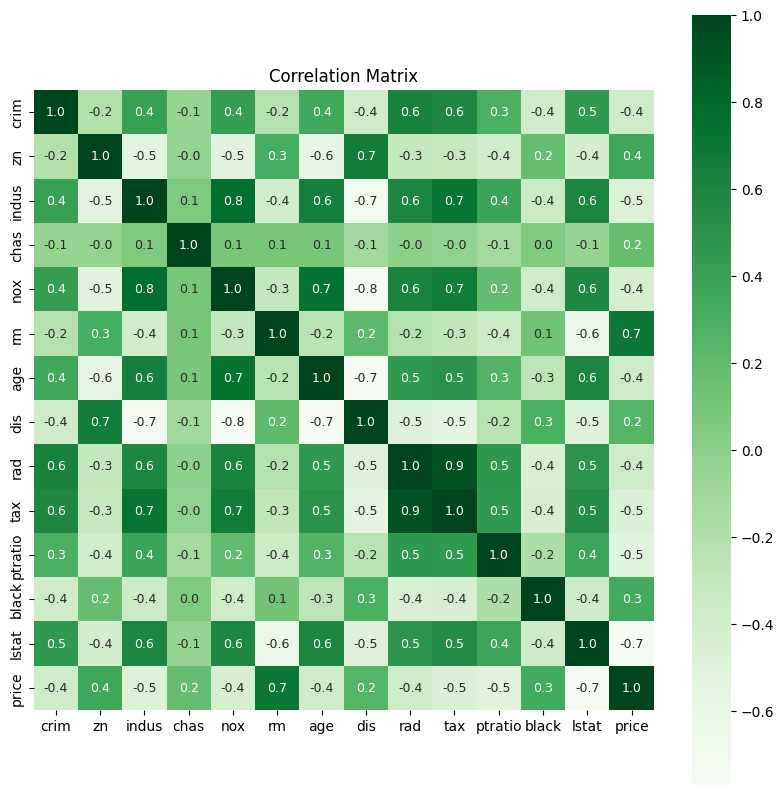

In [82]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 9}, cmap='Greens')
plt.title("Correlation Matrix")
plt.show()

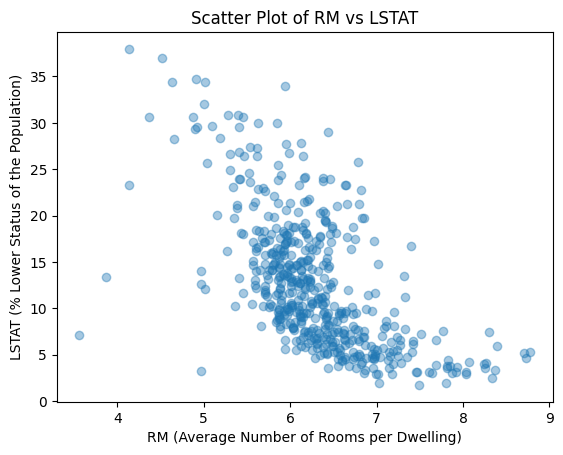

In [83]:
plt.scatter(data["rm"], data["lstat"], alpha=0.4)
plt.xlabel("RM (Average Number of Rooms per Dwelling)")
plt.ylabel("LSTAT (% Lower Status of the Population)")
plt.title("Scatter Plot of RM vs LSTAT")
plt.show()


In [84]:
x = np.array((data['rm'], data['lstat'])).T
print("Features (X):", x)
y = np.array(data["price"])
print("Target (Y):", y)

print("X Shape:", x.shape)
print("Y Shape:", y.shape)

Features (X): [[6.575 4.98 ]
 [6.421 9.14 ]
 [7.185 4.03 ]
 ...
 [6.976 5.64 ]
 [6.794 6.48 ]
 [6.03  7.88 ]]
Target (Y): [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [88]:
class LLS:
    def __init__(self):
        self.coefficients = None

    def fit(self, x_train, y_train):
        x_b = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
        self.coefficients = np.matmul(
            np.matmul(np.linalg.inv(np.matmul(x_b.T, x_b)), x_b.T), y_train
        )
        return self.coefficients

    def predict(self, x_test):
        x_b = np.hstack((np.ones((x_test.shape[0], 1)), x_test))
        return np.matmul(x_b, self.coefficients)

In [89]:
lls = LLS()
w = lls.fit(x_train, y_train)
print("Coefficients:", w)


Coefficients: [-2.41854474  5.27119214 -0.67420903]


In [90]:
y_pred = lls.predict(x_test)

In [91]:
a, b = np.meshgrid(np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), 10),
                   np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), 10))
plane = w[0] + w[1] * a + w[2] * b

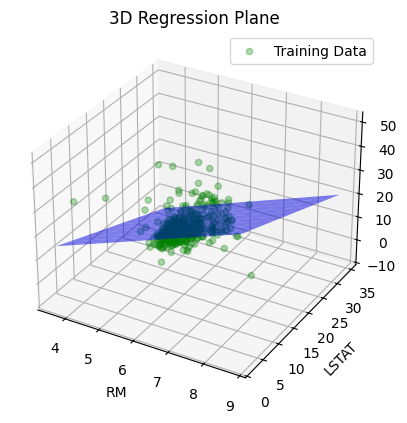

In [92]:
fig = plt.figure(dpi=100, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')
ax.plot_surface(a, b, plane, alpha=0.5, color='blue')
ax.scatter(x_train[:, 0], x_train[:, 1], y_train, label="Training Data", color='green', alpha=0.3)
ax.set_xlabel("RM")
ax.set_ylabel("LSTAT")
ax.set_zlabel("PRICE")
plt.title("3D Regression Plane")
plt.legend()
plt.show()